In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class BaseLayer:
    
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

class OutputLayer(BaseLayer):
    
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u
        
    def backward(self, t):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
class MiddleLayer(BaseLayer):
    
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u))
    
    def backward(self, grad_y):
        delta = grad_y * (1 - self.y) * self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        

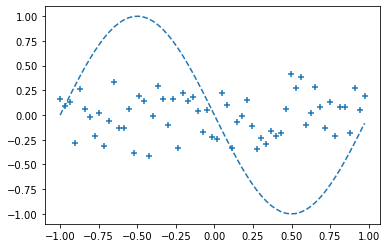

Epoch : 0 Error[0.2747612]


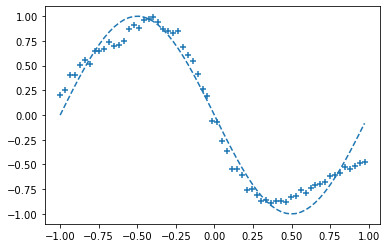

Epoch : 200 Error[0.00913343]


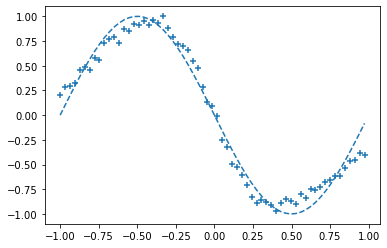

Epoch : 400 Error[0.00637826]


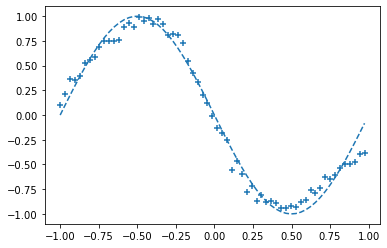

Epoch : 600 Error[0.00467613]


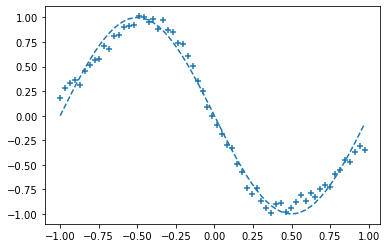

Epoch : 800 Error[0.00407935]


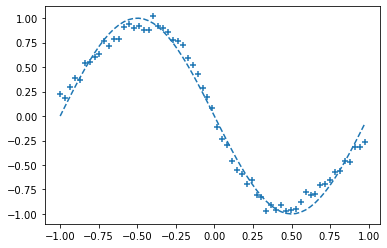

Epoch : 1000 Error[0.00373114]


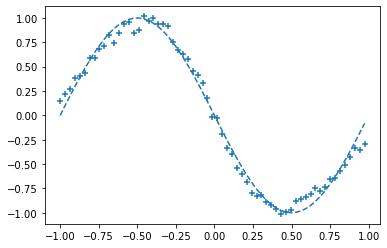

Epoch : 1200 Error[0.0031471]


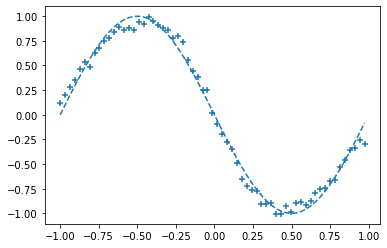

Epoch : 1400 Error[0.00250035]


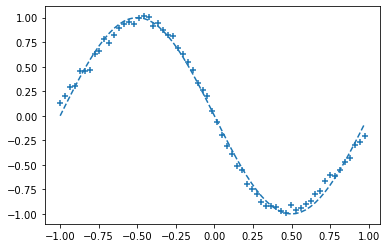

Epoch : 1600 Error[0.00162692]


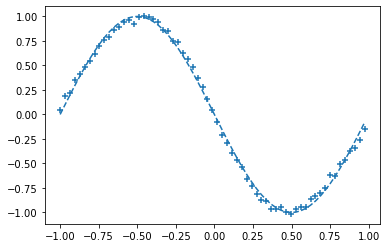

Epoch : 1800 Error[0.00082783]


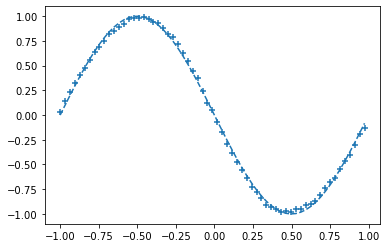

Epoch : 2000 Error[0.00038368]


In [7]:
%matplotlib inline

input_data = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi
n_data = len(correct_data)

n_in = 1
n_mid = 3
n_out = 1

wb_width = 0.1
eta = 0.1
epoch = 2001
interval = 200

middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1]
        t = correct_data[idx:idx+1]
        
        middle_layer.forward(x.reshape(1, 1))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t)
        middle_layer.backward(output_layer.grad_x)
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1)
            
            total_error += (1.0/2.0) * np.square(y-t)
            
            plot_x.append(x)
            plot_y.append(y)
    
    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        print("Epoch : " + str(i), "Error" + str(total_error/n_data))
        

In [10]:
y = output_layer.y.reshape(-1)
print(y)

[0.88608298]
